<a href="https://colab.research.google.com/github/juliasbardelatti/testeAutomatizadoJasmine/blob/main/GlobalSolutionGrupoBranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Grupo branco:**
- Antonny Mendonça: 89014 
- Júlia Sbardelatti: 87395 
- Rafael Soares Monteiro: 88668 
- Wellington dos Santos: 87743



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plot

from skimage.io import imread
from skimage.filters import roberts, sobel, scharr, prewitt

import cv2
from google.colab.patches import cv2_imshow

## Aplicando filtros

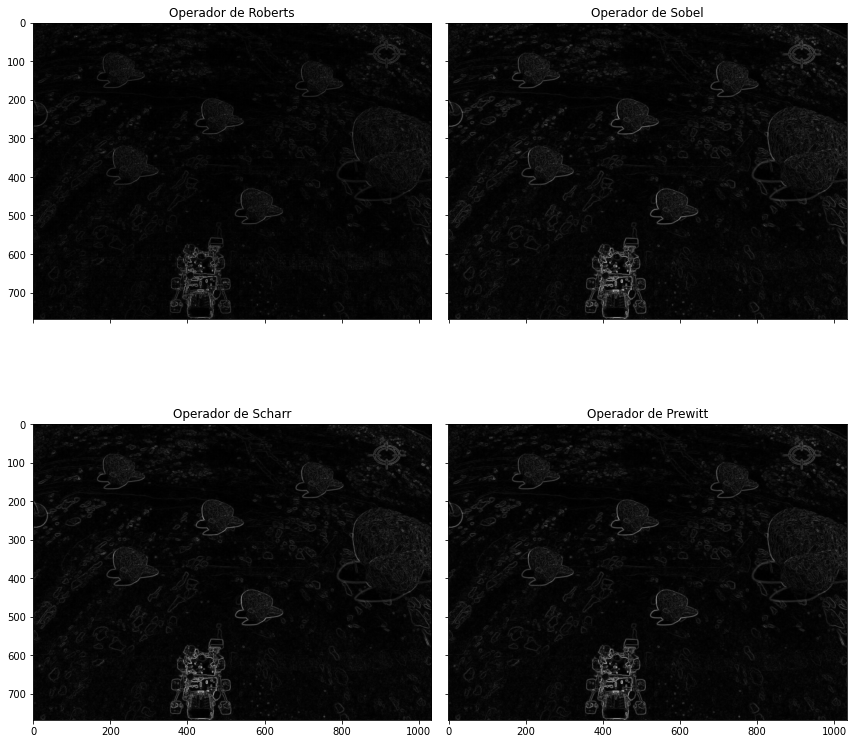

In [ ]:
img = imread("gs-1tiar.JPG", as_gray=True) 
op_roberts = roberts(img)
op_sobel = sobel(img)
op_scharr = scharr(img)
op_prewitt = prewitt(img)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 12))

ax = axes.ravel()

ax[0].imshow(op_roberts, cmap=plt.cm.gray)
ax[0].set_title('Operador de Roberts')

ax[1].imshow(op_sobel, cmap=plt.cm.gray)
ax[1].set_title('Operador de Sobel')

ax[2].imshow(op_scharr, cmap=plt.cm.gray)
ax[2].set_title('Operador de Scharr')

ax[3].imshow(op_prewitt, cmap=plt.cm.gray)
ax[3].set_title('Operador de Prewitt')

plt.tight_layout()
plt.show()


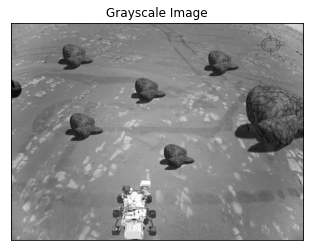

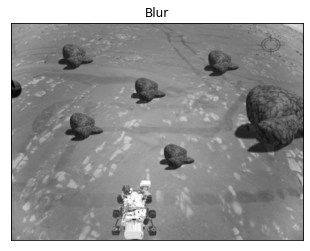

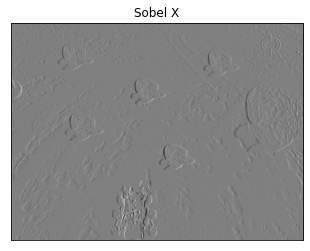

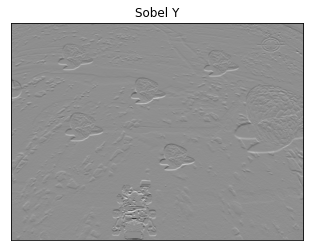

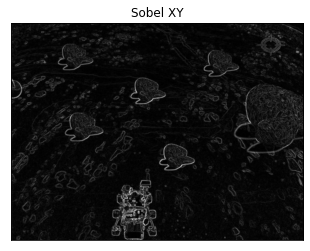

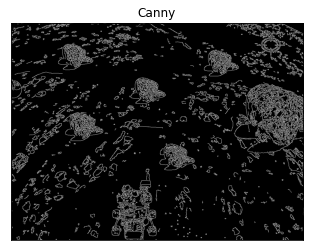

In [ ]:
def img_show(title, image):
    plot.title(title)
    plot.xticks([])
    plot.yticks([])
    plot.imshow(image, cmap="gray")
    plot.show()

img = cv2.imread("/content/gs-1tiar.JPG", cv2.IMREAD_GRAYSCALE)

img_show("Grayscale Image", img)
img_blur = cv2.GaussianBlur(img, (5, 5), 1)
img_sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
img_edges = cv2.Canny(img, 50, 120)
img_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)


img_show("Blur", img_blur)
img_show("Sobel X", img_sobelx)
img_show("Sobel Y", img_sobely)
img_show("Sobel XY", img_sobelxy)
img_show("Canny", img_edges)

## Binarização com limiar

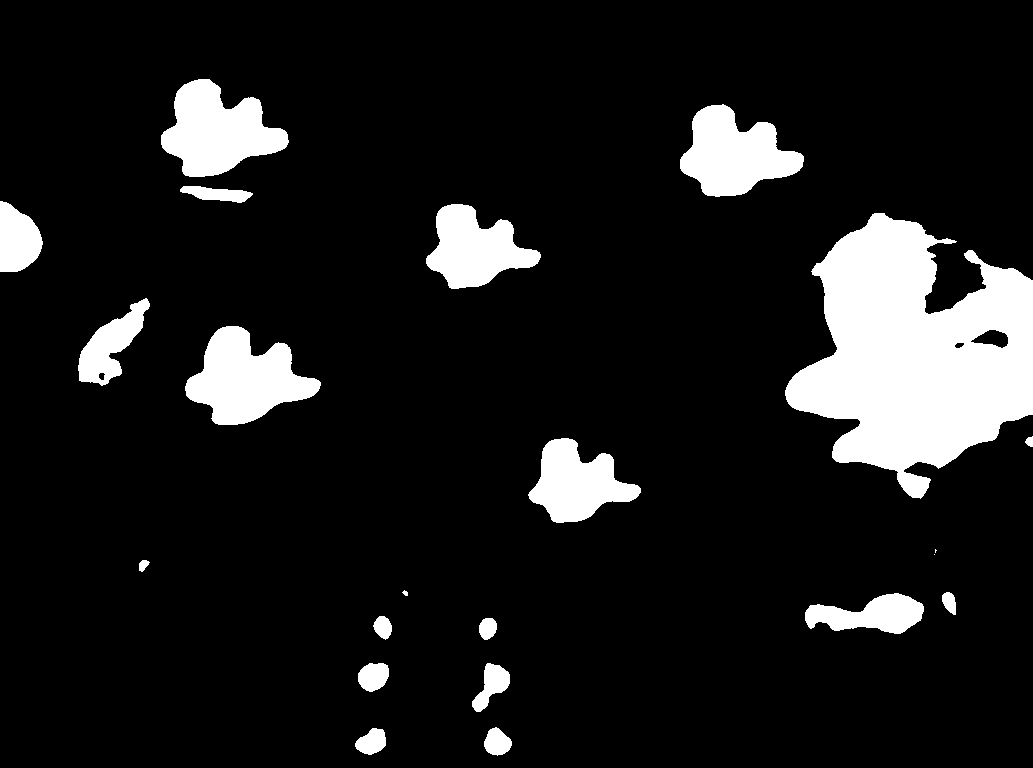

-1

In [ ]:
img = cv2.imread('/content/gs-1tiar.JPG')
kernel = np.ones((3,3),np.uint8)

# Utilização do morphologyEx e blur
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel, iterations = 2)
blur = cv2.blur(closing,(20,20))

# Binarização
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(mask)
cv2.imwrite("detectarPedra.jpg", mask)
cv2.waitKey(0)

### Maneira alternativa de explorar a imagem

*Obs: o caminho completamente preto pode ser tornar mais viável para o robô por não apresentar irregularidades.*

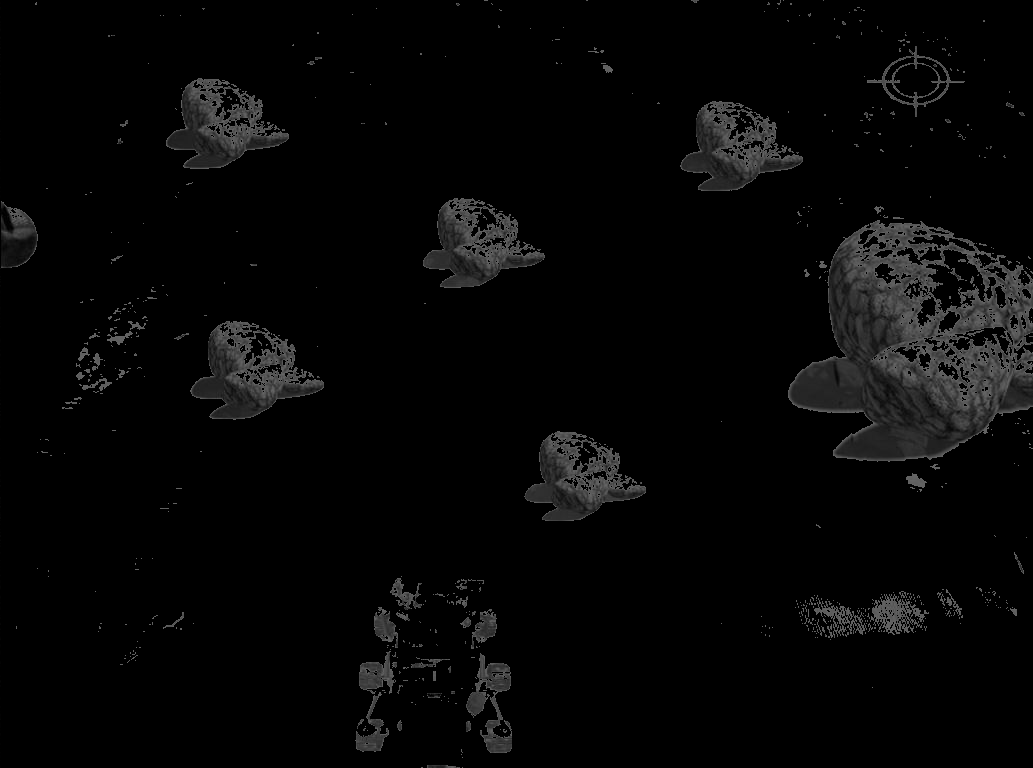

In [ ]:
def carregar_imagem():
    imagem = cv2.imread("gs-1tiar.JPG", 0)
    return imagem

def exibir_imagem(imagem):
    cv2_imshow(imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def binarizar_imagem(imagem):
    limiar, imagem_binarizada = cv2.threshold(imagem, 100, 256, cv2.THRESH_TOZERO_INV)
    cv2.imwrite("newImage.jpg", imagem_binarizada) #salva no disco
    return imagem_binarizada

exibir_imagem(binarizar_imagem(carregar_imagem()))


# Círculo de Hough

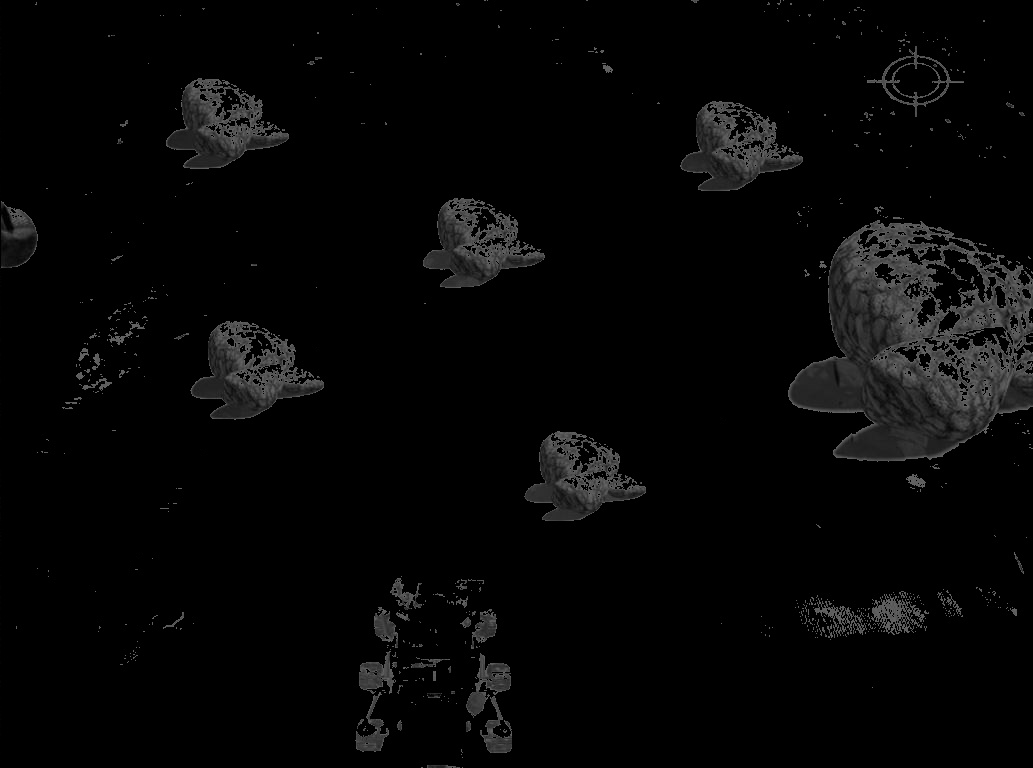

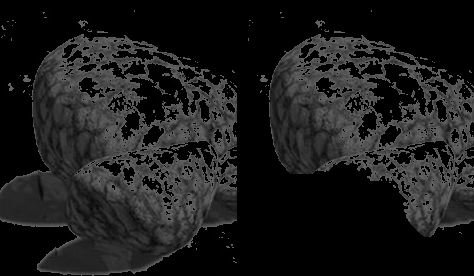

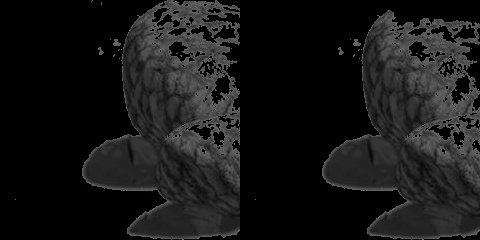

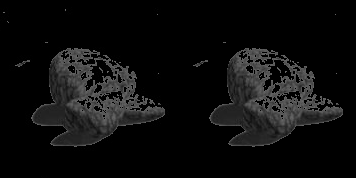

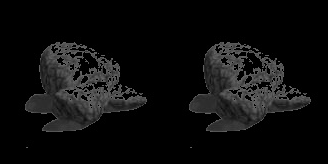

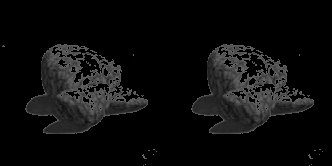

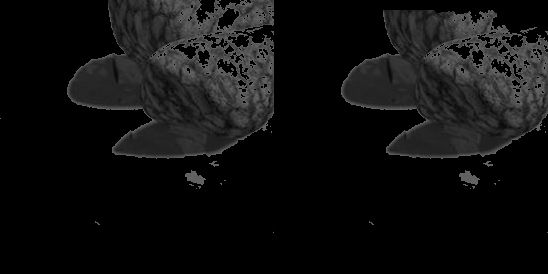

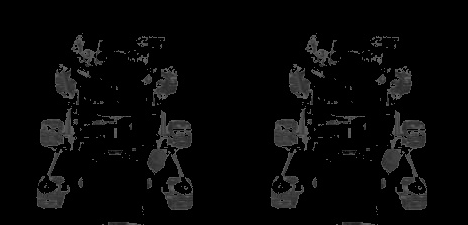

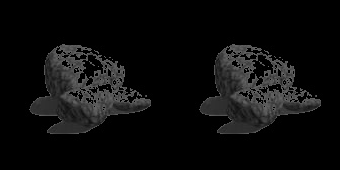

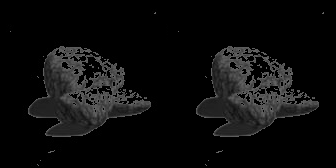

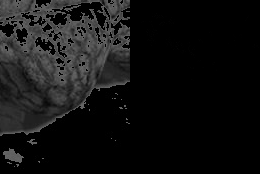

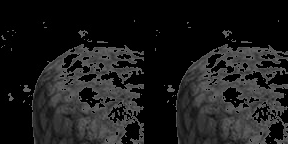

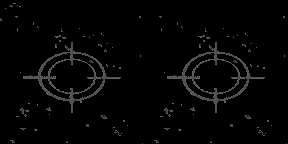

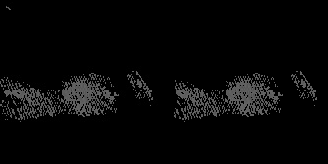

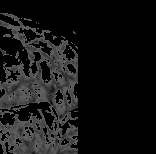

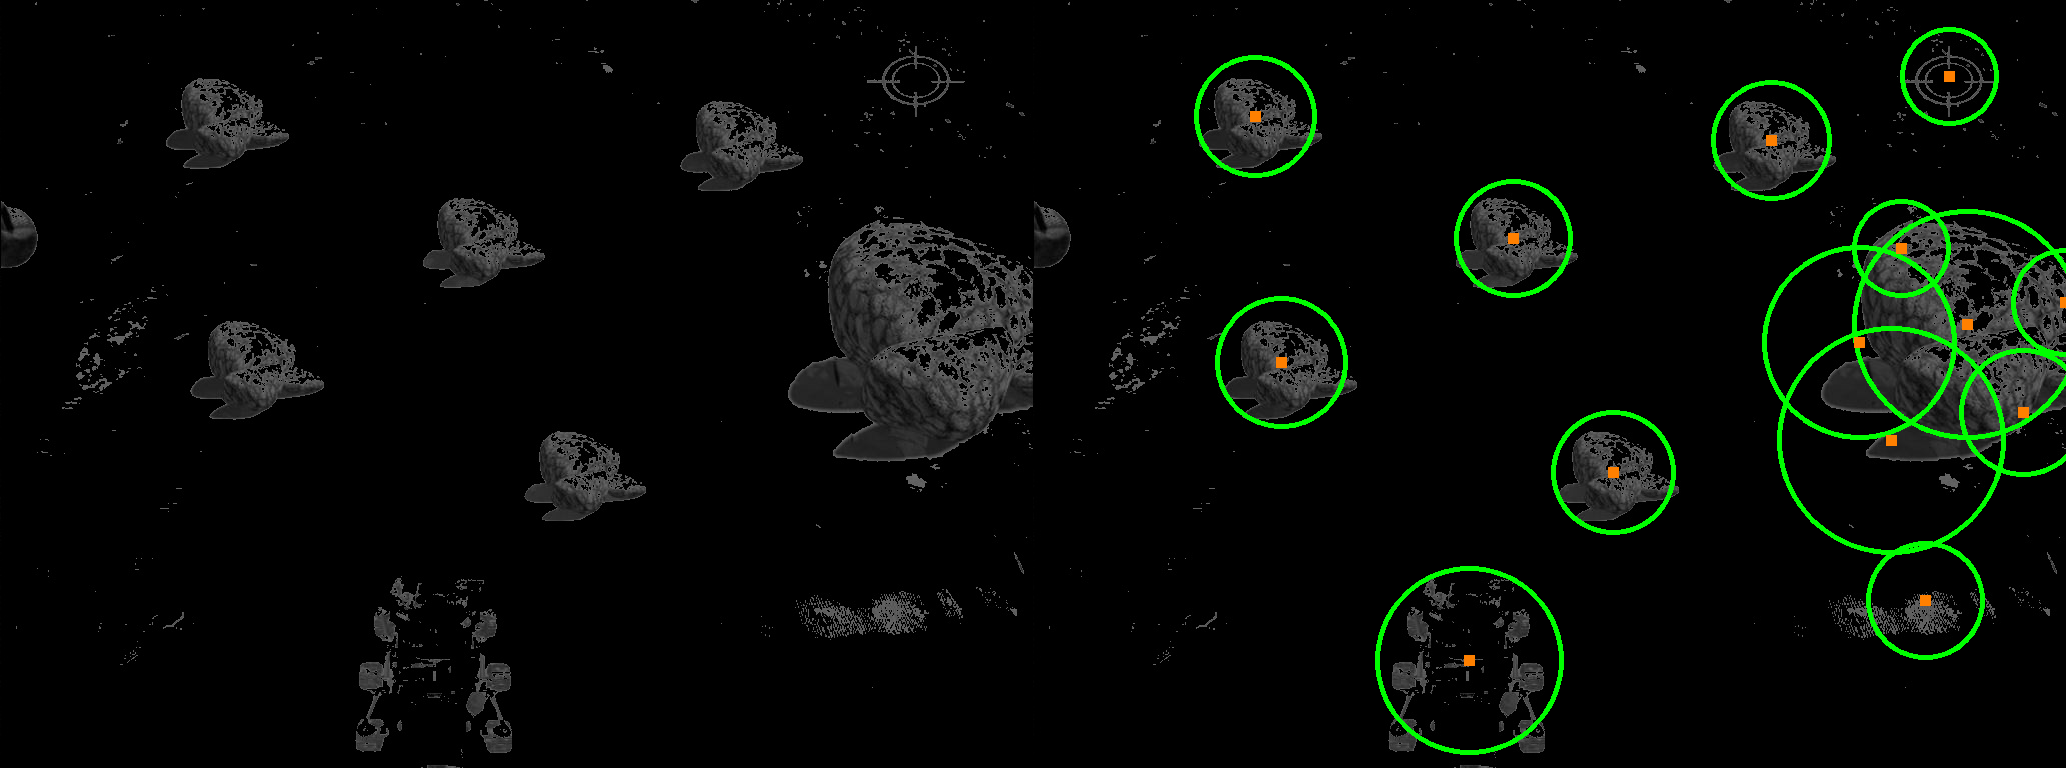

In [ ]:
img = cv2.imread('newImage.jpg')

copia = img.copy()
# Extrai as cores entre o intervalo BGR definido
mask = cv2.inRange(img, (0, 0, 0), (100, 100, 100))
## slice no preto
imask = mask > 0
preto = np.zeros_like(img, np.uint8)
preto[imask] = img[imask]

preto = cv2.cvtColor(preto, cv2.COLOR_BGR2GRAY)
cv2_imshow(preto)

# detecção de círculos
circles = cv2.HoughCircles(preto, cv2.HOUGH_GRADIENT, 1, 100,
                           param1=30, param2=30, minRadius=20, maxRadius=100)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# pelo menos um círculo encontrado
if circles is not None:
    # converte para int
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        roi = img.copy()
        r=r+50
        cv2.circle(copia, (x, y), r - 25, (0, 255, 0), 4)
        cv2.rectangle(copia, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        roi = roi[y-r:y+r, x-r:x+r]
        roi_x, roi_y, _ = roi.shape
        mask = np.zeros(roi.shape[:2], np.uint8)
        rect = (10, 10,roi_x-10, roi_y-10)
        cv2.grabCut(roi, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        roi_grab = roi * mask2[:, :, np.newaxis]
        cv2_imshow(np.hstack([roi, roi_grab]))

    cv2_imshow(np.hstack([img, copia]))
    cv2.waitKey(0)

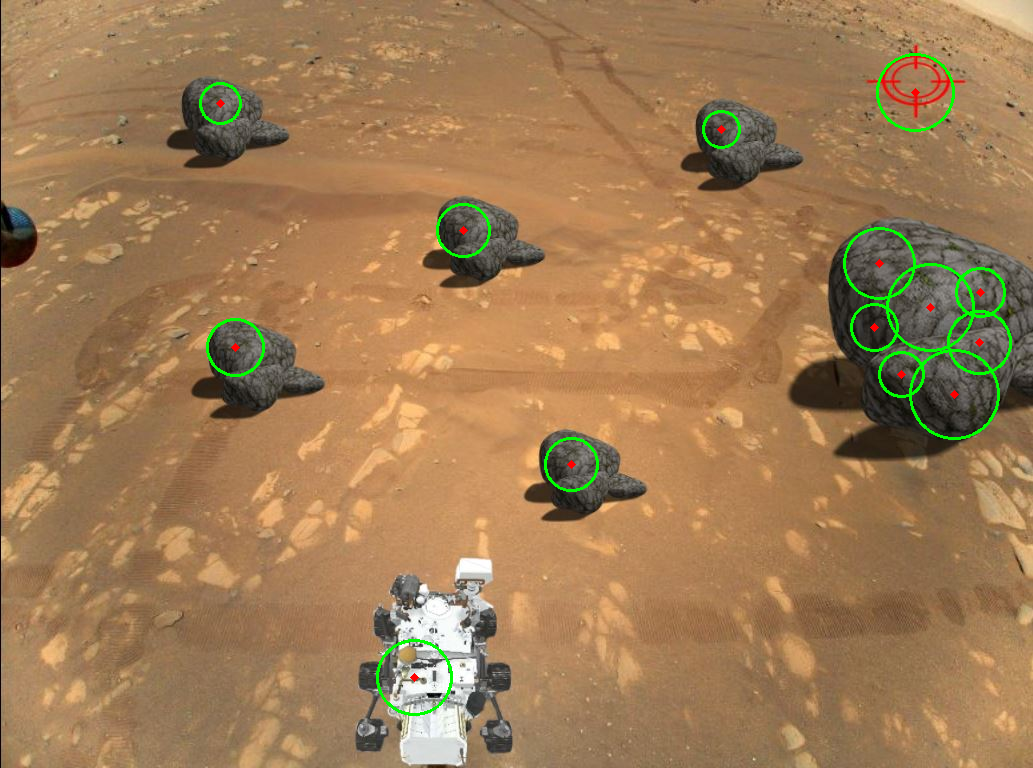

-1

In [ ]:
img_color = cv2.imread('gs-1tiar.JPG')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)

#Hough circle
#circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, minDist=100,param1=36, param2=30, minRadius=25, maxRadius=60)
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, minDist=50,param1=36, param2=30, minRadius=12, maxRadius=45)

if circles is not None:
    for i in circles[0, :]:
        cv2.circle(img_color, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(img_color, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.imwrite('with_circles.png', img_color)

cv2_imshow(img_color)
cv2.waitKey(5000)

Percebemos que com a imagem binarizada, filtros e círculo de Hough as pedras são detectadas normalmente, no entanto o rover não é encontrado tão fácil. 

Por este motivo, utilizamos também segentação de cor vermelha para capturá-lo

## Segmentação por cor

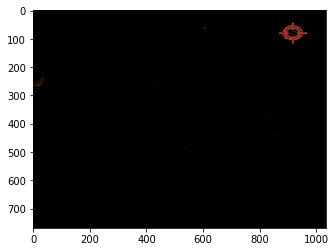

In [ ]:
img = cv2.imread('gs-1tiar.JPG')

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

minimo = np.array([0, 100, 20])
maximo = np.array([10, 255, 255])

mascara = cv2.inRange(hsv, minimo, maximo)

plt.imshow(mascara, cmap="gray")

final = cv2.bitwise_and(imgRGB, imgRGB, mask=mascara)
plt.imshow(final)

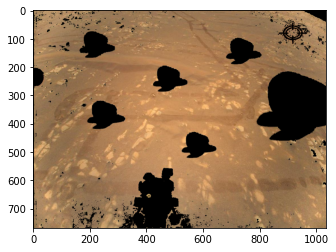

In [ ]:
img = cv2.imread('gs-1tiar.JPG')

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

minimo = np.array([10, 100, 100])
maximo = np.array([20, 255, 255])

mascara = cv2.inRange(hsv, minimo, maximo)

plt.imshow(mascara, cmap="gray")

final = cv2.bitwise_and(imgRGB, imgRGB, mask=mascara)
plt.imshow(final)